<a href="https://colab.research.google.com/github/juwon0502/c19-vaccine/blob/main/Covid_19_Vaccination%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Set up Kaggle API

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download "gpreda/covid-world-vaccination-progress"
!unzip covid-world-vaccination-progress.zip

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes
covid-world-vaccination-progress.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  covid-world-vaccination-progress.zip
replace country_vaccinations.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: country_vaccinations.csv  
replace country_vaccinations_by_manufacturer.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: country_vaccinations_by_manufacturer.csv  


### Import Data and libraries ###

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn.linear_model import LinearRegression
!pip install plotly==4.14.3
import plotly
import plotly.express as px
from plotly.express import *
import seaborn as sns
from fbprophet import Prophet
from datetime import datetime, timedelta
import math
import json

In [9]:
big_df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
big_df['date'] = pd.to_datetime(big_df['date'])
big_df['country'] = big_df['location']
big_df.shape

(112240, 63)

In [10]:
df = pd.read_csv('country_vaccinations.csv')
df['date'] = pd.to_datetime(df['date'])
cols = df.columns
countries = list(df.country.unique())

In [11]:
json_file = open('state_abv.json','r')
us_state_abbrev = json.load(json_file)

### Analysis


#### Exploratory Analysis

In [38]:
df.head()

country iso_code  ...                source_name            source_website
0  Afghanistan      AFG  ...  World Health Organization  https://covid19.who.int/
1  Afghanistan      AFG  ...  World Health Organization  https://covid19.who.int/
2  Afghanistan      AFG  ...  World Health Organization  https://covid19.who.int/
3  Afghanistan      AFG  ...  World Health Organization  https://covid19.who.int/
4  Afghanistan      AFG  ...  World Health Organization  https://covid19.who.int/

[5 rows x 15 columns]

In [39]:
len(df.country.unique())

222

In [40]:
count = df.groupby('country').count()
count['Recorded days of vaccine'] = count['iso_code']
count['country'] = count['iso_code']
count = count.drop(columns=cols)
count = count.sort_values('Recorded days of vaccine', ascending = False)
count.head(10)

Recorded days of vaccine
country                                   
Norway                                 265
Latvia                                 265
England                                260
Scotland                               260
Northern Ireland                       255
Wales                                  255
United Kingdom                         255
Canada                                 255
Russia                                 254
China                                  254

In [41]:
df.describe()

total_vaccinations  ...  daily_vaccinations_per_million
count        2.200900e+04  ...                    39796.000000
mean         1.717361e+07  ...                     3571.428963
std          9.837676e+07  ...                     4570.292760
min          0.000000e+00  ...                        0.000000
25%          1.718900e+05  ...                      489.000000
50%          1.214302e+06  ...                     2127.000000
75%          6.372398e+06  ...                     5350.250000
max          1.988433e+09  ...                   118759.000000

[8 rows x 9 columns]

#### Cases vs Vaccine Numbers

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



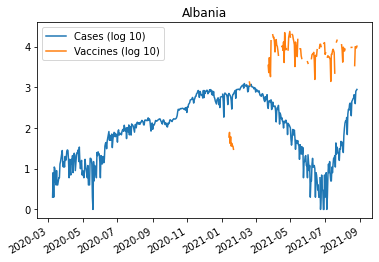

In Albania, before the vaccine, 205.32 cases occured daily on average.
After the vaccine, 345.94 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



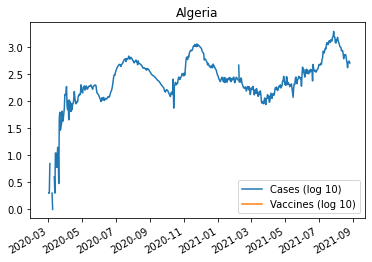

In Algeria, before the vaccine, 314.48 cases occured daily on average.
After the vaccine, 414.59 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



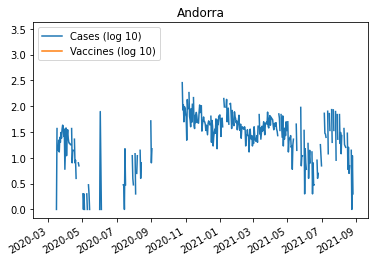

In Andorra, before the vaccine, 29.02 cases occured daily on average.
After the vaccine, 25.55 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



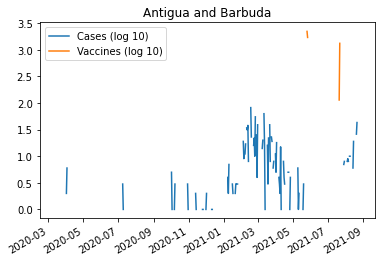

In Antigua and Barbuda, before the vaccine, 1.3 cases occured daily on average.
After the vaccine, 6.02 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



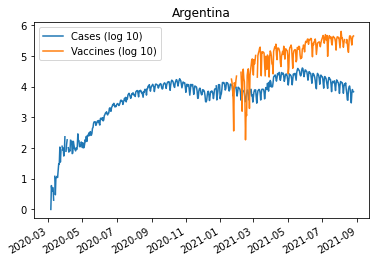

In Argentina, before the vaccine, 5284.1 cases occured daily on average.
After the vaccine, 14819.14 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



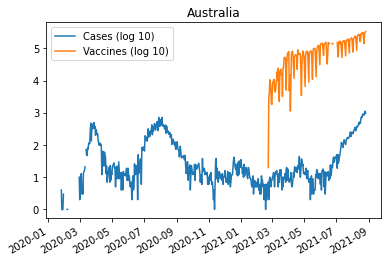

In Australia, before the vaccine, 74.87 cases occured daily on average.
After the vaccine, 103.19 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



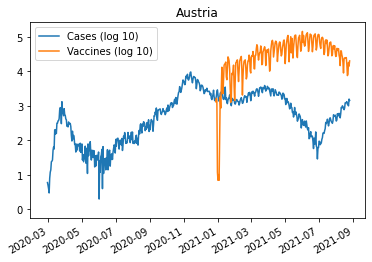

In Austria, before the vaccine, 1145.37 cases occured daily on average.
After the vaccine, 1362.69 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



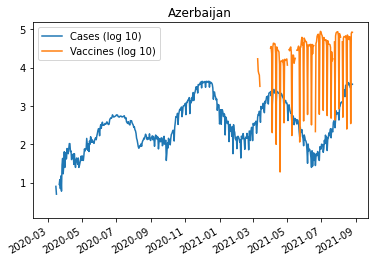

In Azerbaijan, before the vaccine, 704.82 cases occured daily on average.
After the vaccine, 804.46 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



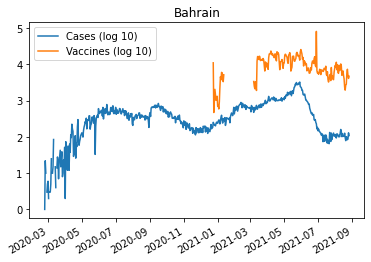

In Bahrain, before the vaccine, 299.12 cases occured daily on average.
After the vaccine, 734.45 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



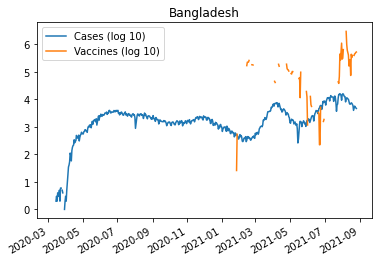

In Bangladesh, before the vaccine, 1643.21 cases occured daily on average.
After the vaccine, 4461.16 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



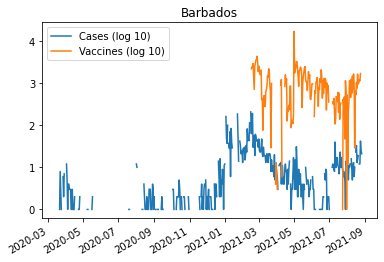

In Barbados, before the vaccine, 6.15 cases occured daily on average.
After the vaccine, 13.89 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



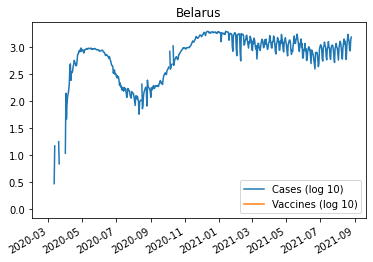

In Belarus, before the vaccine, 614.3 cases occured daily on average.
After the vaccine, 1188.66 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



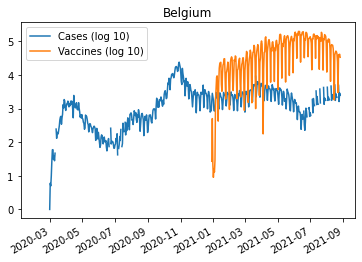

In Belgium, before the vaccine, 1947.8 cases occured daily on average.
After the vaccine, 2217.76 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In Belize, before the vaccine, 35.94 cases occured daily on average.
After the vaccine, 20.0 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



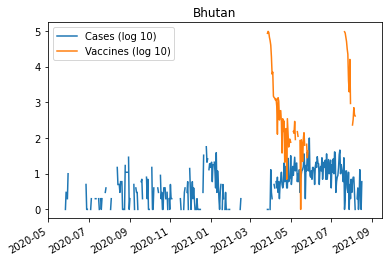

In Bhutan, before the vaccine, 2.76 cases occured daily on average.
After the vaccine, 11.18 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



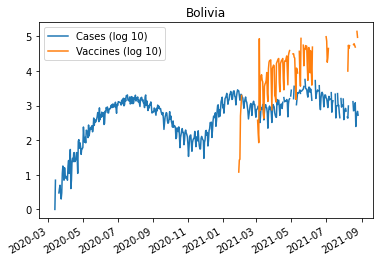

In Bolivia, before the vaccine, 644.19 cases occured daily on average.
After the vaccine, 1331.09 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



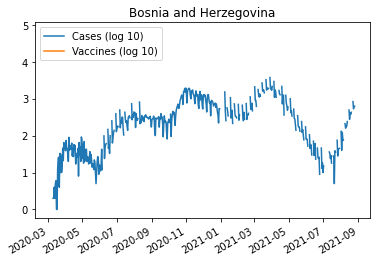

In Bosnia and Herzegovina, before the vaccine, 363.55 cases occured daily on average.
After the vaccine, 441.59 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



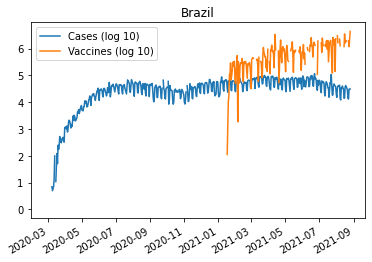

In Brazil, before the vaccine, 25826.13 cases occured daily on average.
After the vaccine, 55081.03 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



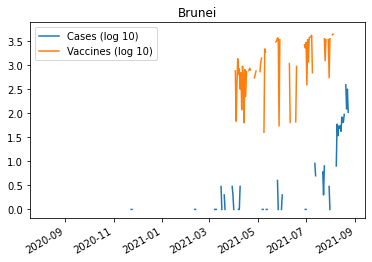

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In Brunei, before the vaccine, 0.24 cases occured daily on average.
After the vaccine, 13.24 cases occured daily on average.



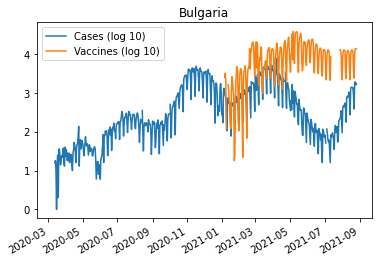

In Bulgaria, before the vaccine, 669.1 cases occured daily on average.
After the vaccine, 1038.91 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



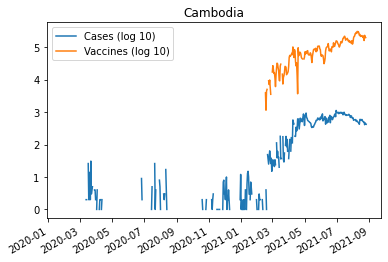

In Cambodia, before the vaccine, 1.26 cases occured daily on average.
After the vaccine, 454.68 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



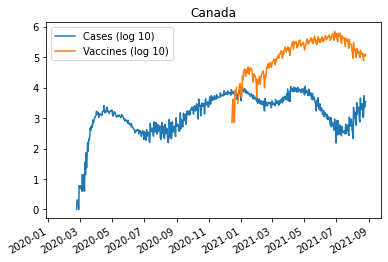

In Canada, before the vaccine, 1442.77 cases occured daily on average.
After the vaccine, 4002.35 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



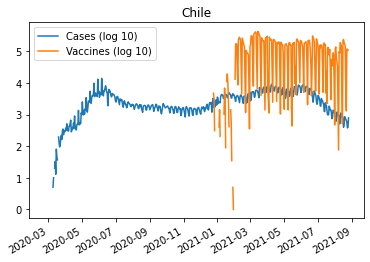

In Chile, before the vaccine, 1937.42 cases occured daily on average.
After the vaccine, 4248.15 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



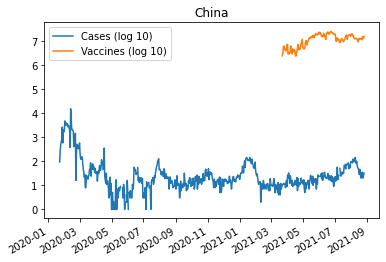

In China, before the vaccine, 263.78 cases occured daily on average.
After the vaccine, 31.47 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



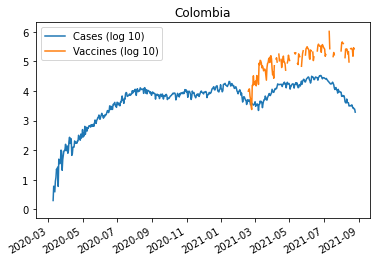

In Colombia, before the vaccine, 6329.3 cases occured daily on average.
After the vaccine, 14117.73 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



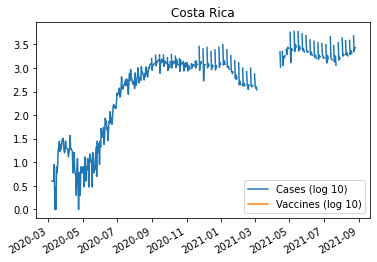

In Costa Rica, before the vaccine, 552.7 cases occured daily on average.
After the vaccine, 1183.15 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



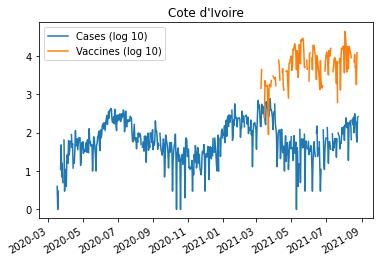

In Cote d'Ivoire, before the vaccine, 92.26 cases occured daily on average.
After the vaccine, 120.36 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



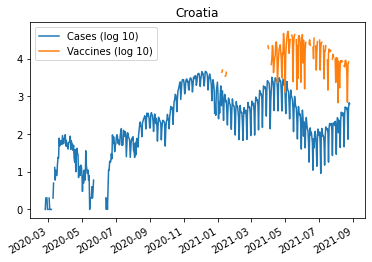

In Croatia, before the vaccine, 668.6 cases occured daily on average.
After the vaccine, 687.61 cases occured daily on average.



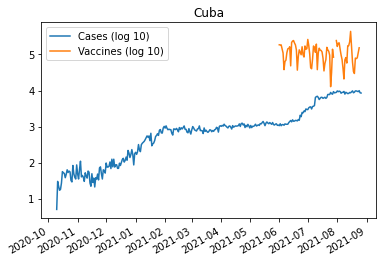

In Cuba, before the vaccine, 524.42 cases occured daily on average.
After the vaccine, 4686.95 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



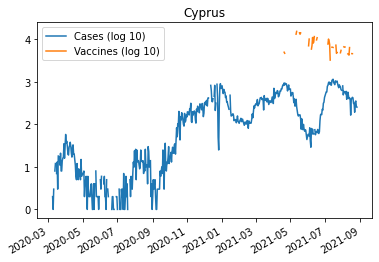

In Cyprus, before the vaccine, 83.19 cases occured daily on average.
After the vaccine, 374.78 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



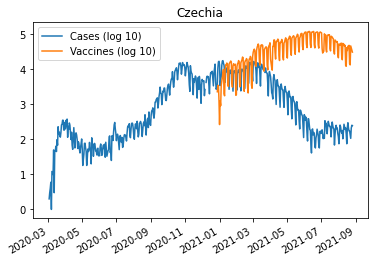

In Czechia, before the vaccine, 2217.84 cases occured daily on average.
After the vaccine, 4159.51 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



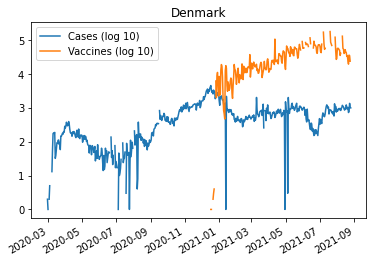

In Denmark, before the vaccine, 409.29 cases occured daily on average.
After the vaccine, 879.59 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



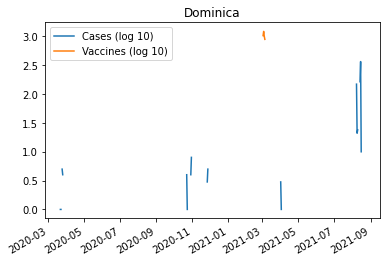

In Dominica, before the vaccine, 0.37 cases occured daily on average.
After the vaccine, 6.18 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



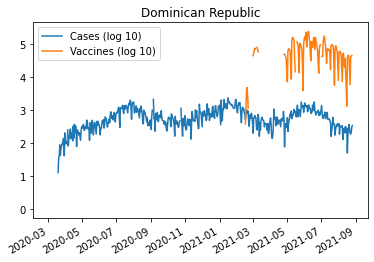

In Dominican Republic, before the vaccine, 654.61 cases occured daily on average.
After the vaccine, 617.34 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



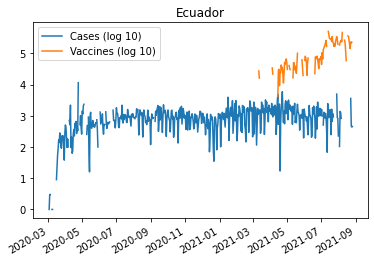

In Ecuador, before the vaccine, 718.76 cases occured daily on average.
After the vaccine, 1219.12 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



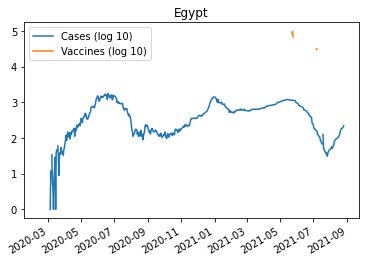

In Egypt, before the vaccine, 467.08 cases occured daily on average.
After the vaccine, 586.12 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



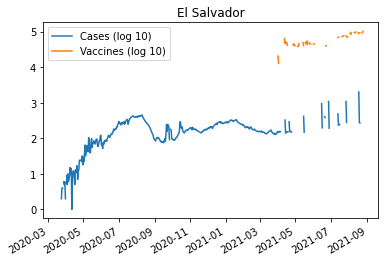

In El Salvador, before the vaccine, 173.73 cases occured daily on average.
After the vaccine, 187.75 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



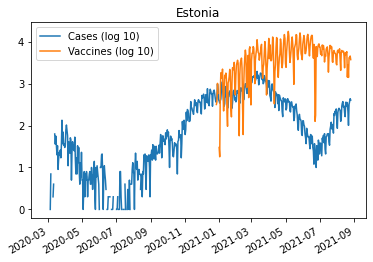

In Estonia, before the vaccine, 82.33 cases occured daily on average.
After the vaccine, 474.54 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



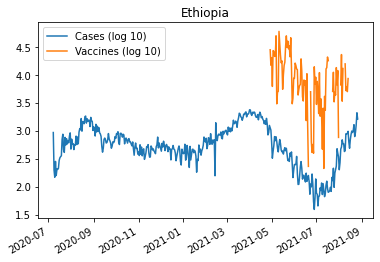

In Ethiopia, before the vaccine, 764.89 cases occured daily on average.
After the vaccine, 568.57 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



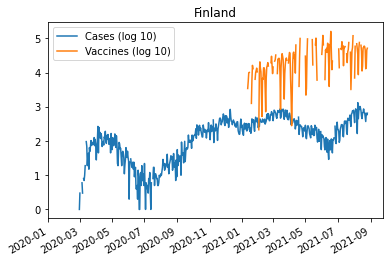

In Finland, before the vaccine, 106.4 cases occured daily on average.
After the vaccine, 369.99 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



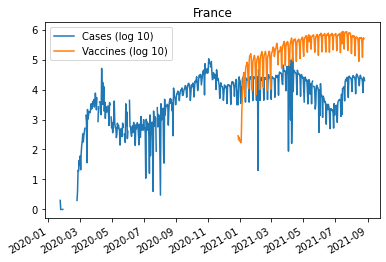

In France, before the vaccine, 7715.05 cases occured daily on average.
After the vaccine, 18672.13 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



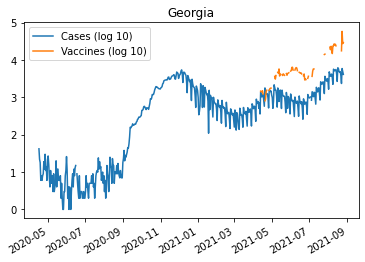

In Georgia, before the vaccine, 826.55 cases occured daily on average.
After the vaccine, 1550.9 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



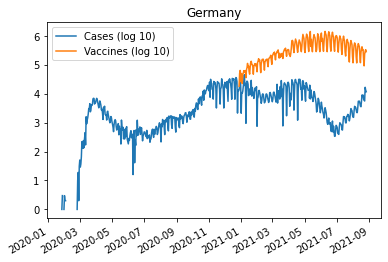

In Germany, before the vaccine, 4914.15 cases occured daily on average.
After the vaccine, 9370.41 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



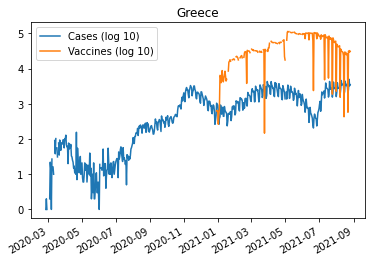

In Greece, before the vaccine, 442.67 cases occured daily on average.
After the vaccine, 1810.53 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



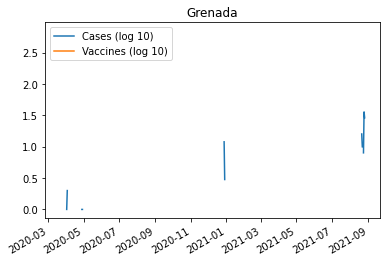

In Grenada, before the vaccine, 0.45 cases occured daily on average.
After the vaccine, 0.75 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



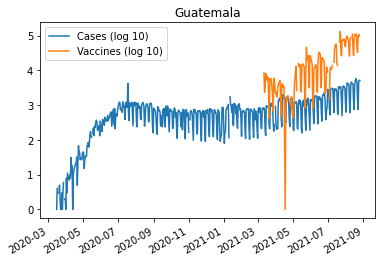

In Guatemala, before the vaccine, 496.45 cases occured daily on average.
After the vaccine, 1543.71 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



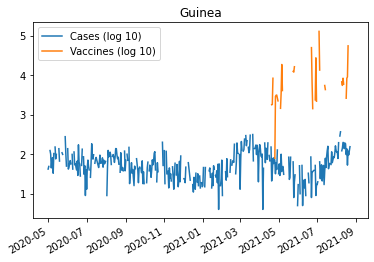

In Guinea, before the vaccine, 52.14 cases occured daily on average.
After the vaccine, 67.85 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



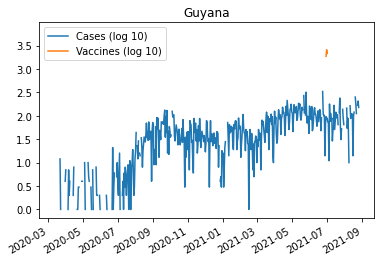

In Guyana, before the vaccine, 24.08 cases occured daily on average.
After the vaccine, 85.14 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



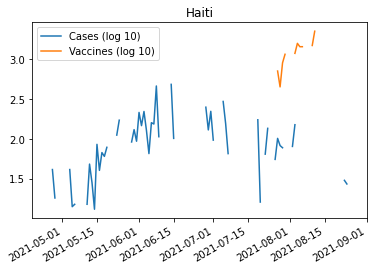

In Haiti, before the vaccine, 76.55 cases occured daily on average.
After the vaccine, 34.74 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



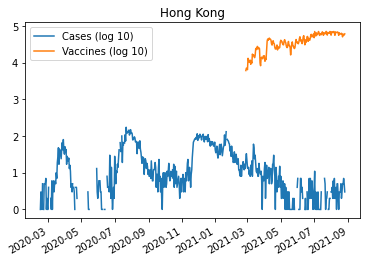

In Hong Kong, before the vaccine, 29.06 cases occured daily on average.
After the vaccine, 6.5 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



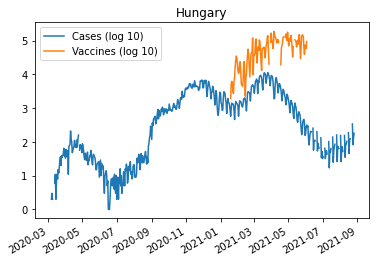

In Hungary, before the vaccine, 1057.06 cases occured daily on average.
After the vaccine, 2047.34 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



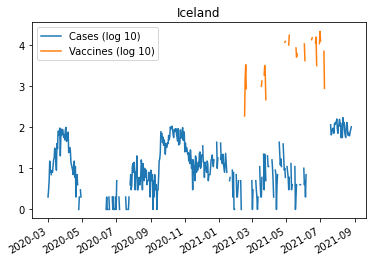

In Iceland, before the vaccine, 18.75 cases occured daily on average.
After the vaccine, 19.61 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



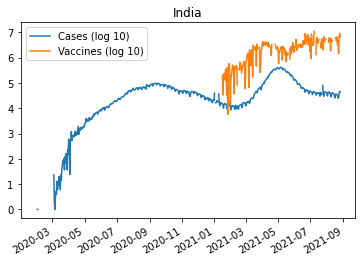

In India, before the vaccine, 29993.4 cases occured daily on average.
After the vaccine, 98551.36 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



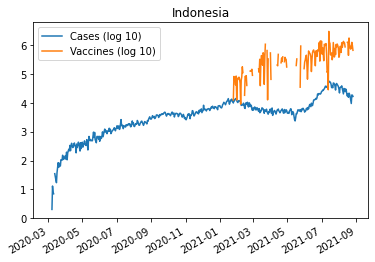

In Indonesia, before the vaccine, 2647.84 cases occured daily on average.
After the vaccine, 14127.83 cases occured daily on average.



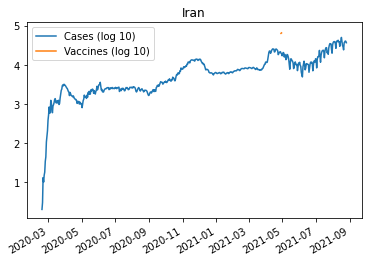

In Iran, before the vaccine, 4130.8 cases occured daily on average.
After the vaccine, 16833.5 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



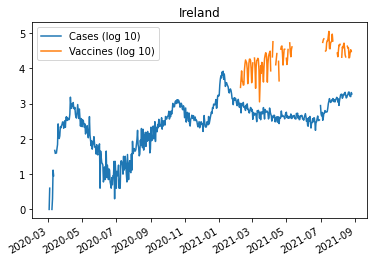

In Ireland, before the vaccine, 294.63 cases occured daily on average.
After the vaccine, 1062.92 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



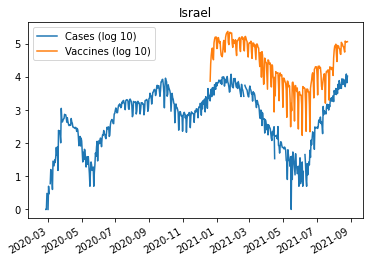

In Israel, before the vaccine, 1225.67 cases occured daily on average.
After the vaccine, 2621.99 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



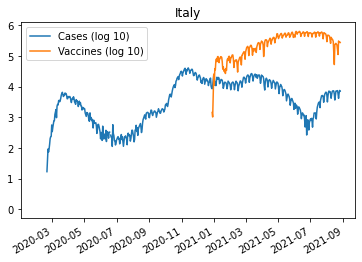

In Italy, before the vaccine, 6159.39 cases occured daily on average.
After the vaccine, 10168.12 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



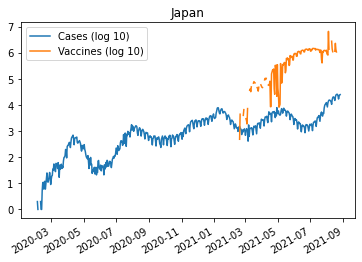

In Japan, before the vaccine, 1095.34 cases occured daily on average.
After the vaccine, 5107.88 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



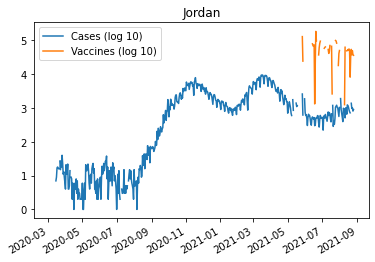

In Jordan, before the vaccine, 979.9 cases occured daily on average.
After the vaccine, 2134.41 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



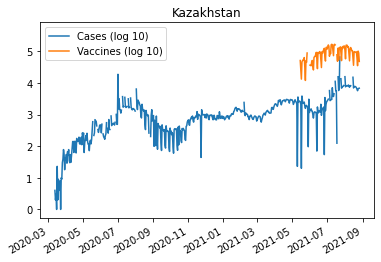

In Kazakhstan, before the vaccine, 723.98 cases occured daily on average.
After the vaccine, 2895.03 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



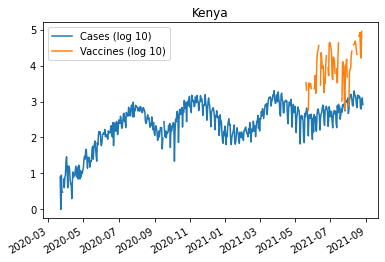

In Kenya, before the vaccine, 303.4 cases occured daily on average.
After the vaccine, 716.3 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



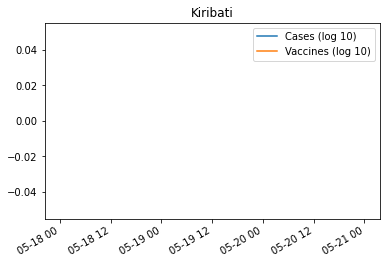

In Kiribati, before the vaccine, 0.14 cases occured daily on average.
After the vaccine, 0.0 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



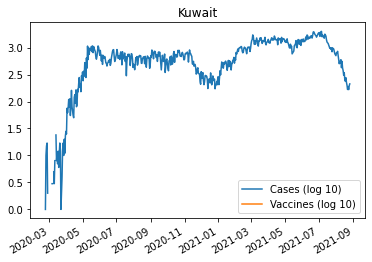

In Kuwait, before the vaccine, 485.89 cases occured daily on average.
After the vaccine, 1071.72 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



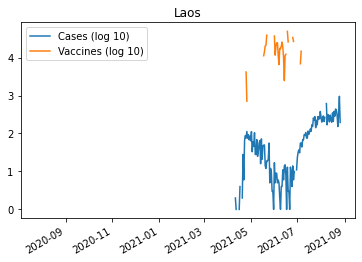

In Laos, before the vaccine, 0.09 cases occured daily on average.
After the vaccine, 86.23 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



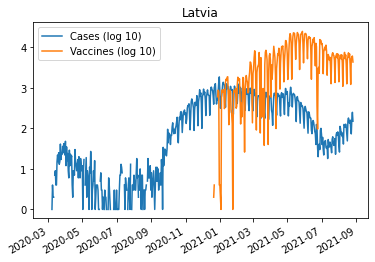

In Latvia, before the vaccine, 69.7 cases occured daily on average.
After the vaccine, 460.07 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



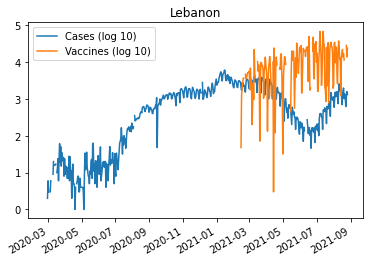

In Lebanon, before the vaccine, 933.22 cases occured daily on average.
After the vaccine, 1347.49 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



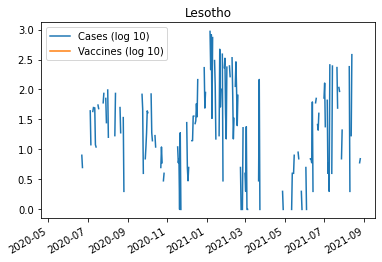

In Lesotho, before the vaccine, 35.08 cases occured daily on average.
After the vaccine, 22.64 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



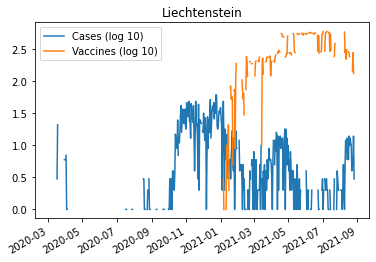

In Liechtenstein, before the vaccine, 6.09 cases occured daily on average.
After the vaccine, 5.91 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In Lithuania, before the vaccine, 430.18 cases occured daily on average.
After the vaccine, 683.88 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



In Luxembourg, before the vaccine, 151.11 cases occured daily on average.
After the vaccine, 122.31 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



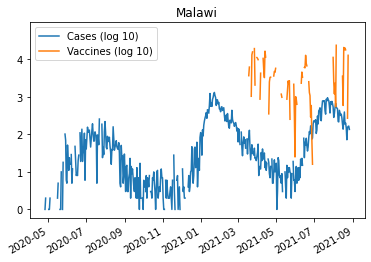

In Malawi, before the vaccine, 100.8 cases occured daily on average.
After the vaccine, 166.85 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In Malaysia, before the vaccine, 783.17 cases occured daily on average.
After the vaccine, 7351.16 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



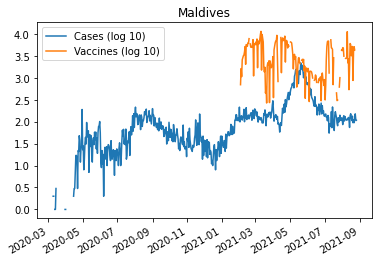

In Maldives, before the vaccine, 48.51 cases occured daily on average.
After the vaccine, 312.52 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



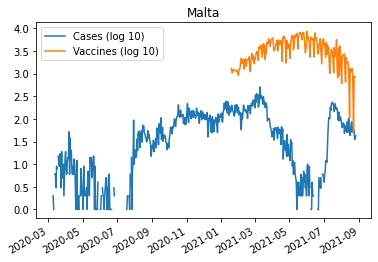

In Malta, before the vaccine, 48.88 cases occured daily on average.
After the vaccine, 92.36 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



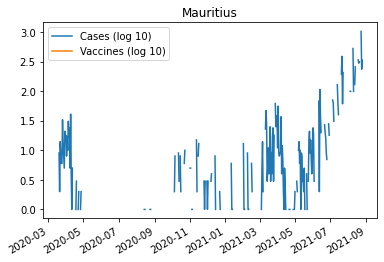

In Mauritius, before the vaccine, 1.78 cases occured daily on average.
After the vaccine, 37.9 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



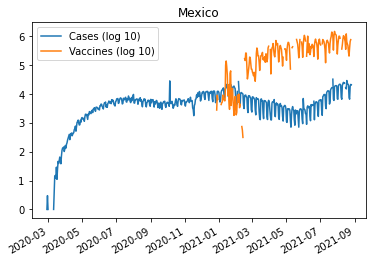

In Mexico, before the vaccine, 4500.26 cases occured daily on average.
After the vaccine, 7893.02 cases occured daily on average.



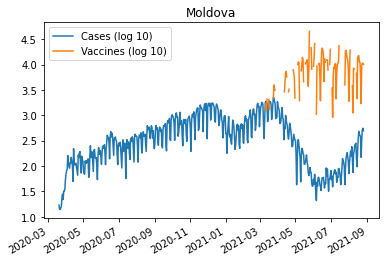

In Moldova, before the vaccine, 546.14 cases occured daily on average.
After the vaccine, 429.24 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



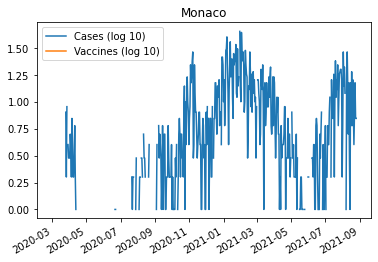

In Monaco, before the vaccine, 2.71 cases occured daily on average.
After the vaccine, 9.76 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In Mongolia, before the vaccine, 7.72 cases occured daily on average.
After the vaccine, 1070.18 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



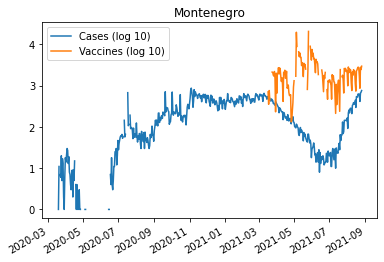

In Montenegro, before the vaccine, 209.15 cases occured daily on average.
After the vaccine, 220.15 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



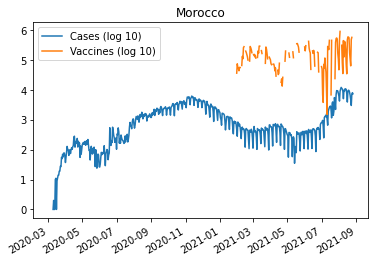

In Morocco, before the vaccine, 1410.79 cases occured daily on average.
After the vaccine, 1744.6 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



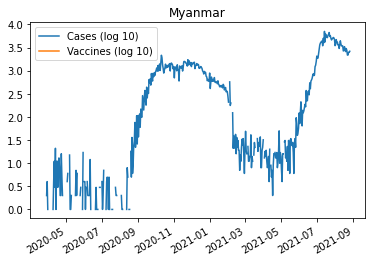

In Myanmar, before the vaccine, 452.32 cases occured daily on average.
After the vaccine, 1152.85 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



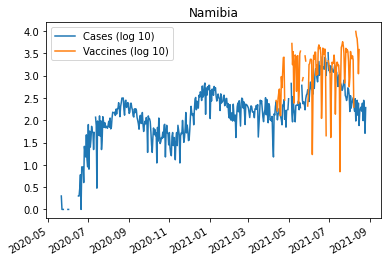

In Namibia, before the vaccine, 128.18 cases occured daily on average.
After the vaccine, 510.67 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



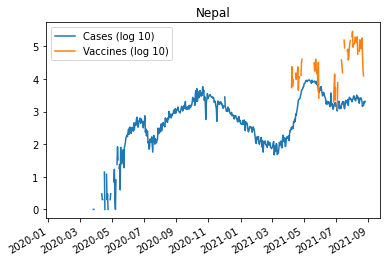

In Nepal, before the vaccine, 735.12 cases occured daily on average.
After the vaccine, 2277.59 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



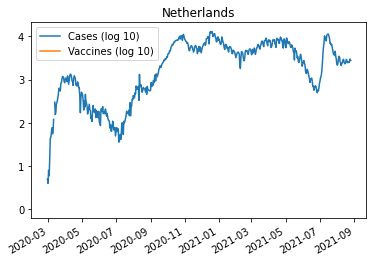

In Netherlands, before the vaccine, 2762.4 cases occured daily on average.
After the vaccine, 4739.69 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



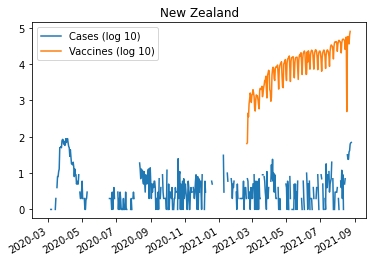

In New Zealand, before the vaccine, 6.58 cases occured daily on average.
After the vaccine, 5.03 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



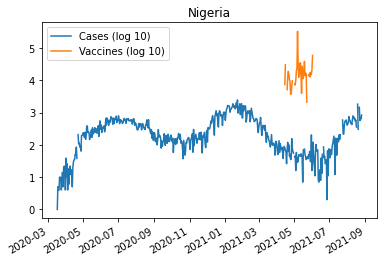

In Nigeria, before the vaccine, 445.9 cases occured daily on average.
After the vaccine, 186.11 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



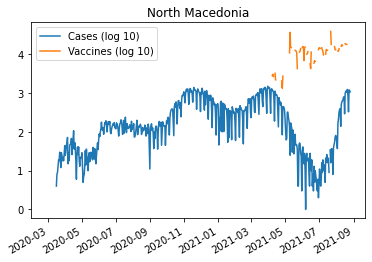

In North Macedonia, before the vaccine, 272.76 cases occured daily on average.
After the vaccine, 393.52 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



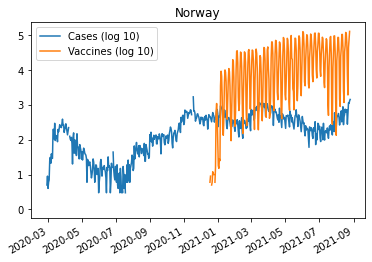

In Norway, before the vaccine, 130.68 cases occured daily on average.
After the vaccine, 436.35 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



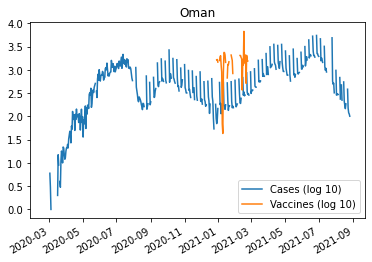

In Oman, before the vaccine, 417.12 cases occured daily on average.
After the vaccine, 716.17 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



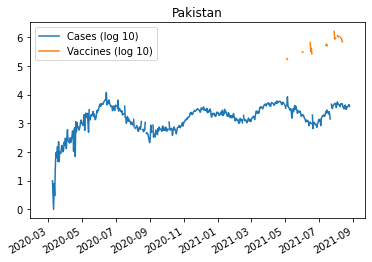

In Pakistan, before the vaccine, 1596.64 cases occured daily on average.
After the vaccine, 2896.57 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



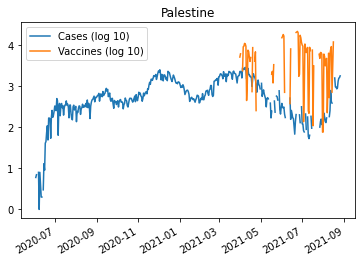

In Palestine, before the vaccine, 792.66 cases occured daily on average.
After the vaccine, 629.07 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



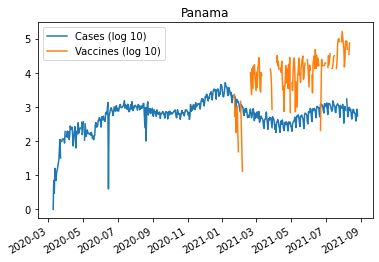

In Panama, before the vaccine, 954.22 cases occured daily on average.
After the vaccine, 700.2 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



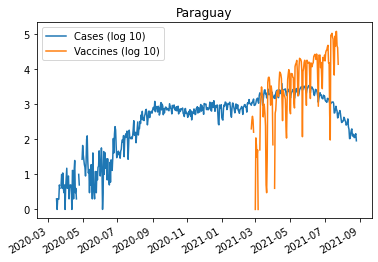

In Paraguay, before the vaccine, 430.66 cases occured daily on average.
After the vaccine, 1644.26 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



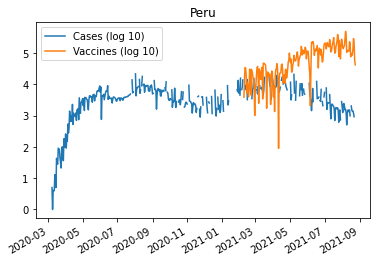

In Peru, before the vaccine, 3500.58 cases occured daily on average.
After the vaccine, 4784.97 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



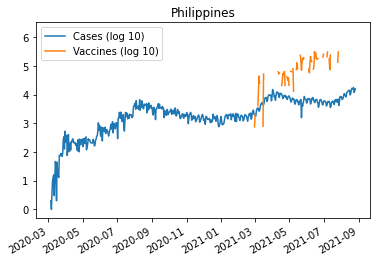

In Philippines, before the vaccine, 1595.12 cases occured daily on average.
After the vaccine, 7360.85 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



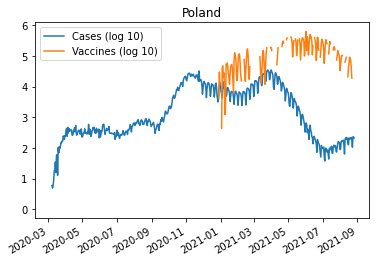

In Poland, before the vaccine, 4206.69 cases occured daily on average.
After the vaccine, 6734.24 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



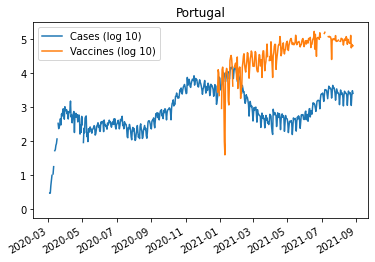

In Portugal, before the vaccine, 1309.99 cases occured daily on average.
After the vaccine, 2614.92 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



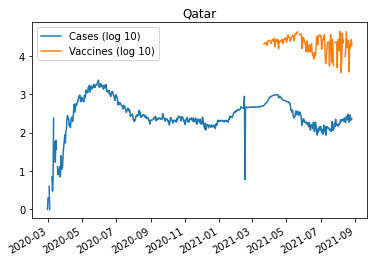

In Qatar, before the vaccine, 478.65 cases occured daily on average.
After the vaccine, 361.42 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



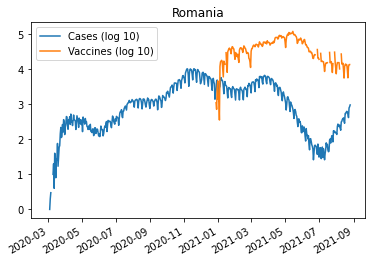

In Romania, before the vaccine, 2012.33 cases occured daily on average.
After the vaccine, 1975.98 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In Russia, before the vaccine, 8327.9 cases occured daily on average.
After the vaccine, 15969.01 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In Rwanda, before the vaccine, 51.31 cases occured daily on average.
After the vaccine, 351.6 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



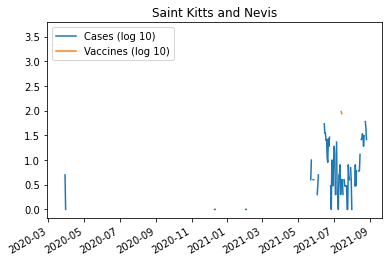

In Saint Kitts and Nevis, before the vaccine, 0.12 cases occured daily on average.
After the vaccine, 4.91 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In Saint Lucia, before the vaccine, 7.43 cases occured daily on average.
After the vaccine, 27.05 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In Samoa, before the vaccine, 0.02 cases occured daily on average.
After the vaccine, 0.0 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



In San Marino, before the vaccine, 10.14 cases occured daily on average.
After the vaccine, 8.78 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In Saudi Arabia, before the vaccine, 1171.8 cases occured daily on average.
After the vaccine, 767.1 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



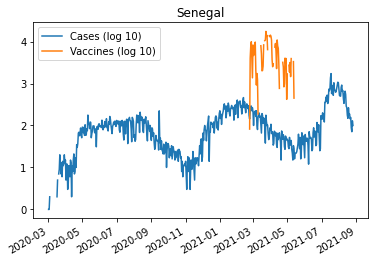

In Senegal, before the vaccine, 92.23 cases occured daily on average.
After the vaccine, 211.76 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



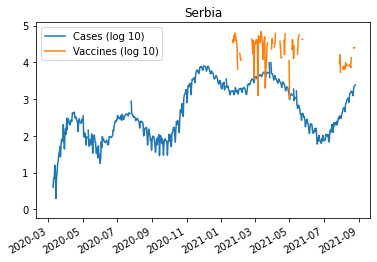

In Serbia, before the vaccine, 1149.05 cases occured daily on average.
After the vaccine, 1719.65 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



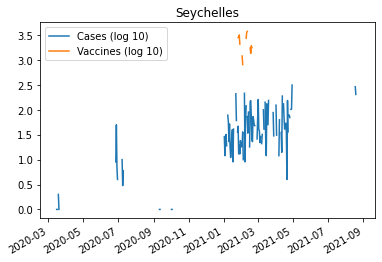

In Seychelles, before the vaccine, 1.5 cases occured daily on average.
After the vaccine, 84.03 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



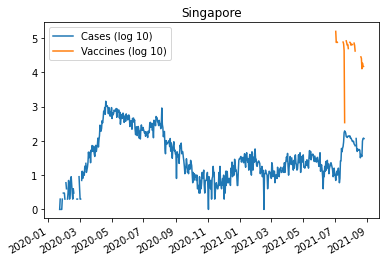

In Singapore, before the vaccine, 166.4 cases occured daily on average.
After the vaccine, 35.18 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In Slovakia, before the vaccine, 616.65 cases occured daily on average.
After the vaccine, 880.78 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



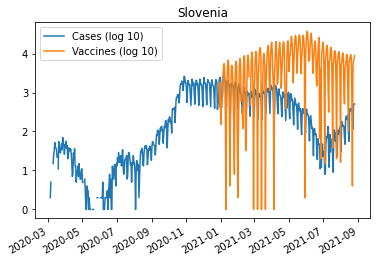

In Slovenia, before the vaccine, 384.46 cases occured daily on average.
After the vaccine, 621.3 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



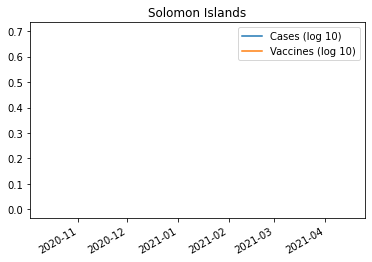

In Solomon Islands, before the vaccine, 0.11 cases occured daily on average.
After the vaccine, 0.01 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



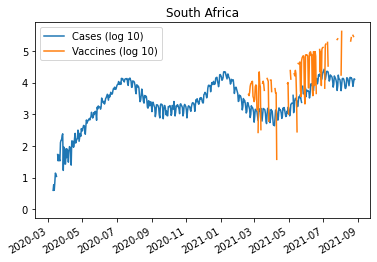

In South Africa, before the vaccine, 4289.97 cases occured daily on average.
After the vaccine, 6469.08 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In South Korea, before the vaccine, 239.44 cases occured daily on average.
After the vaccine, 858.44 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



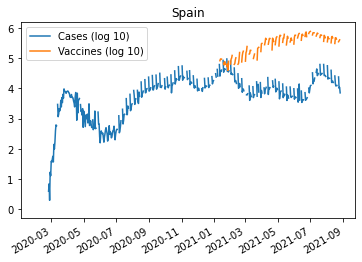

In Spain, before the vaccine, 5704.93 cases occured daily on average.
After the vaccine, 12315.13 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



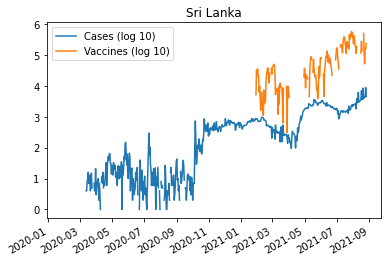

In Sri Lanka, before the vaccine, 165.38 cases occured daily on average.
After the vaccine, 1666.71 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



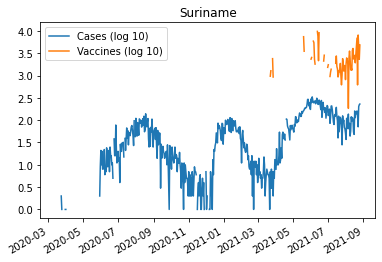

In Suriname, before the vaccine, 25.7 cases occured daily on average.
After the vaccine, 104.09 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In Sweden, before the vaccine, 1200.15 cases occured daily on average.
After the vaccine, 2988.03 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



In Switzerland, before the vaccine, 1375.39 cases occured daily on average.
After the vaccine, 1427.46 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



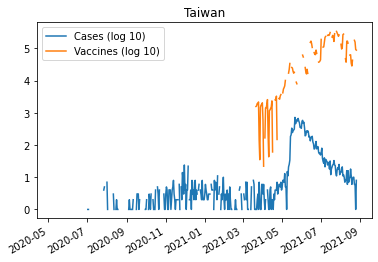

In Taiwan, before the vaccine, 1.78 cases occured daily on average.
After the vaccine, 93.97 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



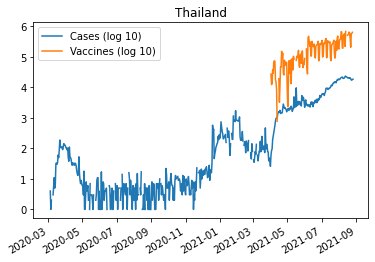

In Thailand, before the vaccine, 71.18 cases occured daily on average.
After the vaccine, 6050.06 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



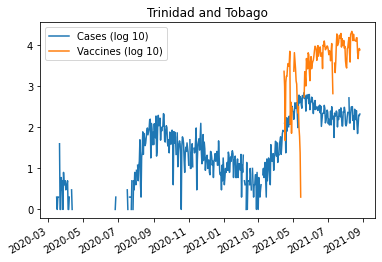

In Trinidad and Tobago, before the vaccine, 22.61 cases occured daily on average.
After the vaccine, 187.09 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



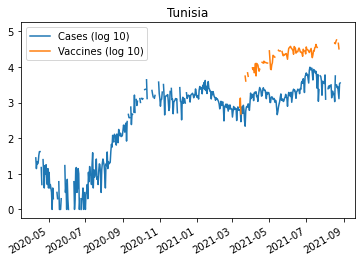

In Tunisia, before the vaccine, 712.3 cases occured daily on average.
After the vaccine, 2446.77 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



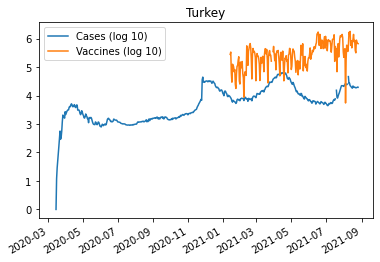

In Turkey, before the vaccine, 4961.11 cases occured daily on average.
After the vaccine, 17464.52 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



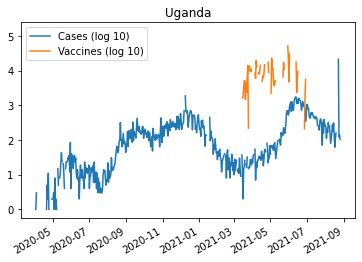

In Uganda, before the vaccine, 118.23 cases occured daily on average.
After the vaccine, 460.01 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



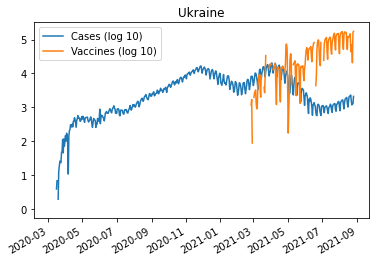

In Ukraine, before the vaccine, 3795.73 cases occured daily on average.
After the vaccine, 5517.07 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



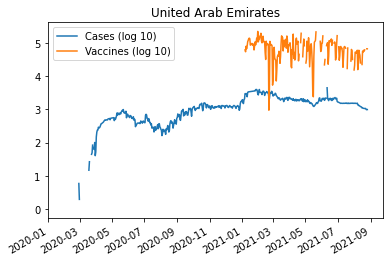

In United Arab Emirates, before the vaccine, 627.87 cases occured daily on average.
After the vaccine, 2131.07 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



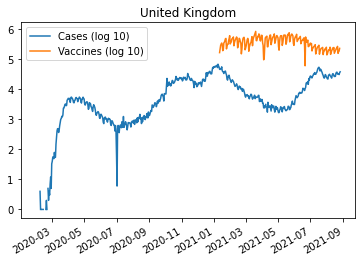

In United Kingdom, before the vaccine, 5791.65 cases occured daily on average.
After the vaccine, 18770.29 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



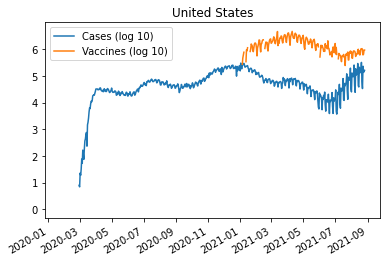

In United States, before the vaccine, 53516.98 cases occured daily on average.
After the vaccine, 82466.89 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



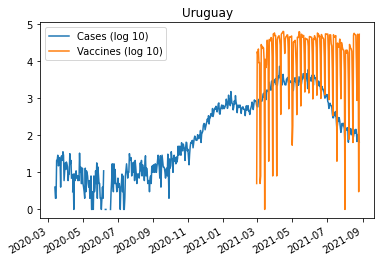

In Uruguay, before the vaccine, 161.09 cases occured daily on average.
After the vaccine, 1811.69 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



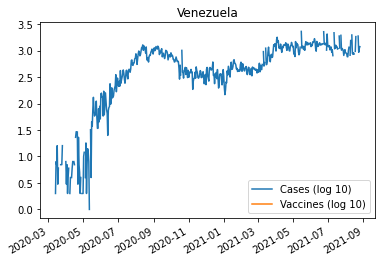

In Venezuela, before the vaccine, 393.9 cases occured daily on average.
After the vaccine, 1025.18 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



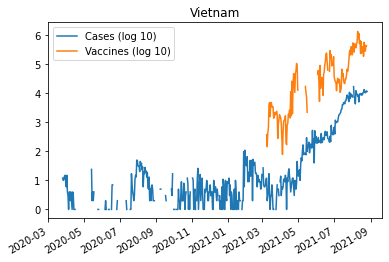

In Vietnam, before the vaccine, 6.82 cases occured daily on average.
After the vaccine, 2256.86 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



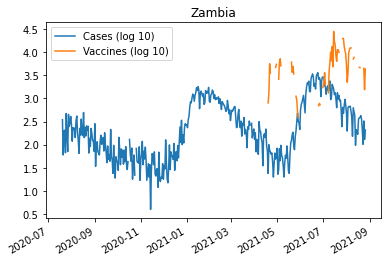

In Zambia, before the vaccine, 323.73 cases occured daily on average.
After the vaccine, 852.57 cases occured daily on average.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log10



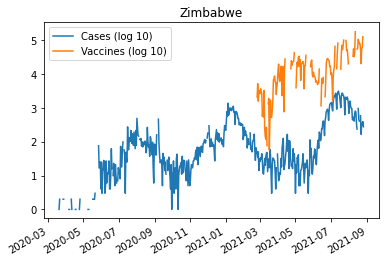

In Zimbabwe, before the vaccine, 105.74 cases occured daily on average.
After the vaccine, 466.12 cases occured daily on average.

23 countries improved after the distribution of vaccines.


In [37]:
same_col = ['date', 'new_vaccinations', 'new_cases','country']
df3 = pd.DataFrame(columns=same_col)
temp_df = pd.DataFrame()
improved = 0
for country in countries:
  temp_df = temp_df.iloc[0:0]
  start_date = min(df.loc[df['country']==country].date)
  date_diff = (datetime.today() - start_date).days
  track_date = start_date + timedelta(days = -date_diff*2)
  temp_df = big_df.loc[big_df['country']==country]
  temp_df = temp_df.loc[temp_df['date'] >= track_date]
  temp_df.drop(temp_df.columns.difference(same_col),1,inplace=True)
  temp_df['cases_log'] = np.log10(temp_df['new_cases'])
  temp_df['vaccine_log'] = np.log10(temp_df['new_vaccinations'])
  na_count = temp_df.new_vaccinations.isna().sum()
  b_avg = temp_df.loc[temp_df['date'] < start_date].new_cases.mean()
  a_avg = temp_df.loc[temp_df['date'] >= start_date].new_cases.mean()
  if na_count-date_diff > date_diff*0.9*2 or math.isnan(a_avg) == True:
    pass
  else:
    X = temp_df.date
    y1 = temp_df.cases_log
    y2 = temp_df.vaccine_log
    # y1 = temp_df.new_cases
    # y2 = temp_df.new_vaccinations
    plt.plot(X, y1, label = 'Cases (log 10)')
    plt.plot(X, y2, label = 'Vaccines (log 10)')
    plt.gcf().autofmt_xdate()
    plt.title(country)
    plt.legend()
    plt.show() 
    print(f"In {country}, before the vaccine, {round(b_avg,2)} cases occured daily on average.")
    print(f"After the vaccine, {round(a_avg,2)} cases occured daily on average.\n")
    if b_avg > a_avg:
      improved+=1

print(f"{improved} countries improved after the distribution of vaccines.")


### Charts

#### Gantt chart

In [16]:
gt = pd.DataFrame(columns=['Country','Start','Finish'])
gt = gt.iloc[0:0]
df_country = pd.DataFrame()
for country in df.country.unique():
    df_coutnry = df_country.iloc[0:0]
    df_country = df.loc[df['country']==country]
    min_date = min(df_country['date'])
    max_date = max(df_country['date'])
#     print(country, min_date, max_date)
    gt = gt.append({'Country':country,'Start':min_date,'Finish':max_date}, ignore_index = True)
    
# gt.head()
    
fig = px.timeline(gt, x_start="Start", x_end="Finish", y="Country", title = "Timeline of Country Vaccinations")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

#### Line Charts

In [17]:
fig = px.line(df, x="date", y="total_vaccinations", color='country', title = "Total Vaccinations by country")
fig.show()

In [18]:
fig = px.line(df, x="date", y="total_vaccinations_per_hundred", color='country', title = "Total Vaccinations (per 100) by country")
fig.show()

In [19]:
fig = px.line(df, x="date", y="people_fully_vaccinated_per_hundred", color='country', title = "People Fully Vaccinated by country (per 100)")
fig.show()

#### Choropleth Map



In [20]:
uiso = df.iso_code.unique()

cm_df = pd.DataFrame(columns=df.columns)
ct_df = pd.DataFrame()
temp_df = pd.DataFrame()
max_date = 0


for u in uiso:
  temp_df = temp_df.iloc[0:0]
  ct_df = ct_df.iloc[0:0]
  ct_df = df.loc[df['iso_code'] == u] 
  max_date = ct_df.date.max()
  temp_df = ct_df.loc[ct_df['date'] == max_date]
  try:
    while math.isnan(temp_df.total_vaccinations_per_hundred):
      max_date = max_date + timedelta(days = -1)
      # print('hello')
  except:
    pass
  temp_df = temp_df.loc[temp_df['date'] == max_date]
    
  cm_df = cm_df.append(temp_df)

In [21]:
fig = px.choropleth(cm_df, locations = cm_df.country.unique(), locationmode= "country names", color = "total_vaccinations_per_hundred", color_continuous_scale='peach', range_color=[0,100], title="Total Vaccinations Per Hundred")
fig.show()

In [22]:
usa = pd.read_csv('https://covid.ourworldindata.org/data/vaccinations/us_state_vaccinations.csv')
usa['date'] = pd.to_datetime(usa['date'])
state = usa.location.unique()
usa['state'] = usa['location'].apply(lambda x: us_state_abbrev[x])
# usa['state'] = [us_state_abbrev.get(x, None) for x in list(usa.location)]
# usa.head()

In [23]:
cm2_df = pd.DataFrame()
st_df = pd.DataFrame()

for s in state:
  counter = 0
  temp_df = temp_df.iloc[0:0]
  st_df = st_df.iloc[0:0]
  st_df = usa.loc[usa['location'] == s] 
  max_date = st_df.date.max()
  temp_df = st_df.loc[st_df['date'] == max_date]
  if math.isnan(temp_df.total_vaccinations_per_hundred):
    pass
  cm2_df = cm2_df.append(temp_df)
# cm2_df.head()

In [24]:
fig2 = px.choropleth(cm2_df, locations = usa.state.unique(), scope = 'usa', locationmode= "USA-states", 
                    color = "total_vaccinations_per_hundred", range_color=[0,100], title="Total Vaccinations Per Hundred")

fig2.show()

#### USA Time Series Analysis

In [26]:
usa = df.loc[df['country']=='United States'].reset_index().set_index(keys='index')
start = min(usa['date'])
usa['days_since'] = (usa['date']-start).dt.days
usa.head()
usa_y = usa.total_vaccinations_per_hundred

In [27]:
fig = px.line(usa, x="date", y="total_vaccinations_per_hundred", title = "USA Total Vaccinations Per 100")
fig.show()

In [33]:
usa2 = usa.rename(columns={'date': 'ds', 'people_fully_vaccinated_per_hundred':'y'})
m = Prophet()
m.fit(usa2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
609 2022-08-21
610 2022-08-22
611 2022-08-23
612 2022-08-24
613 2022-08-25

In [35]:
predict = m.predict(future)
predict = predict.loc[predict['yhat_lower'] <= 100]
predict.tail()
# predict.iloc[365].yhat_lower

ds      trend  ...  multiplicative_terms_upper       yhat
609 2022-08-21  80.050115  ...                         0.0  80.136613
610 2022-08-22  80.130065  ...                         0.0  80.167033
611 2022-08-23  80.210014  ...                         0.0  80.162898
612 2022-08-24  80.289964  ...                         0.0  80.219120
613 2022-08-25  80.369914  ...                         0.0  80.317892

[5 rows x 16 columns]

Text(0.5, 1.0, 'USA')

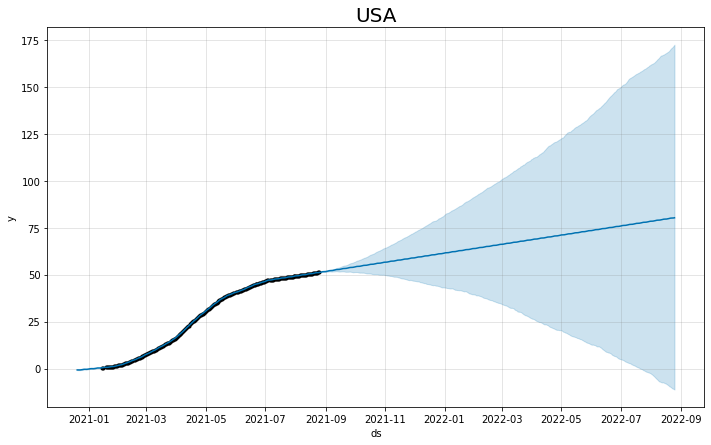

In [36]:
fig = m.plot(predict);
ax = fig.gca()
ax.set_title('USA', size=20)